# **Project: Boston Housing**


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
print('Ready')

Ready

In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [26]:
#familiarizing with data
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Middle-aged
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Old
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Middle-aged
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Middle-aged
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Middle-aged


In [6]:
#data types
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
# Checking for missing values
missing_values = boston_df.isnull().sum()
print(missing_values)

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


In [8]:
# Checking for duplicates
duplicates = boston_df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool


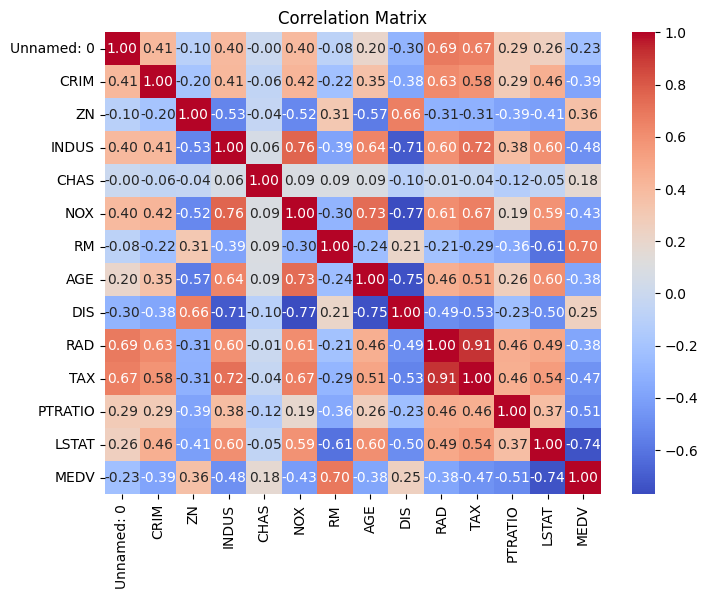

In [10]:
# Displaying the matrix
correlation_matrix = boston_df.corr()
pyplot.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
pyplot.title('Correlation Matrix')
pyplot.show()

In [11]:
# Descriptive statistics
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


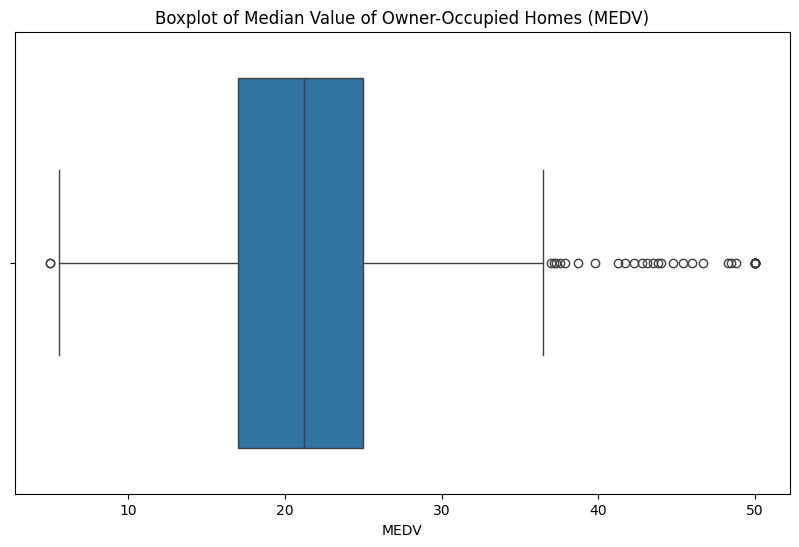

In [12]:
# MEDV
pyplot.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])  
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('MEDV')
pyplot.show()

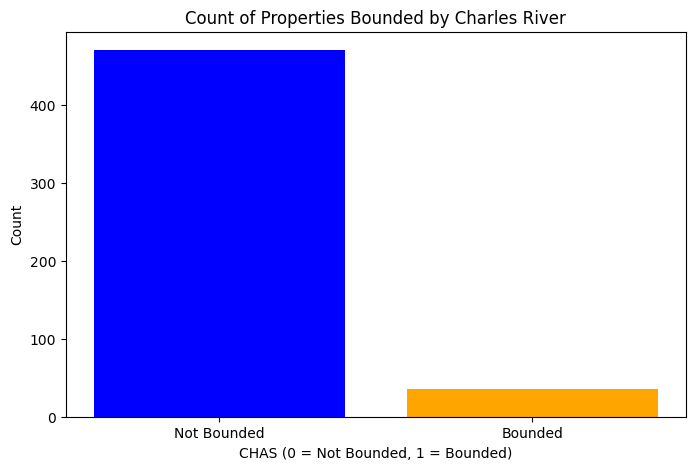

In [16]:
# CHAS

chas_counts = boston_df['CHAS'].value_counts()
pyplot.figure(figsize=(8, 5))
pyplot.bar(chas_counts.index, chas_counts.values, color=['blue', 'orange'])
pyplot.title('Count of Properties Bounded by Charles River')
pyplot.xlabel('CHAS (0 = Not Bounded, 1 = Bounded)')
pyplot.ylabel('Count')
pyplot.xticks([0, 1], ['Not Bounded', 'Bounded'])  
pyplot.show()

<Figure size 1000x600 with 0 Axes>

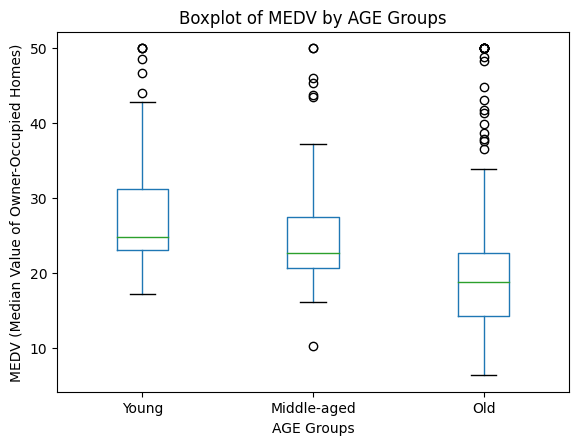

In [17]:
# Age groups
bins = [0, 35, 70, 100]
labels = ['Young', 'Middle-aged', 'Old']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)
pyplot.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='AGE_Group', grid=False)
pyplot.title('Boxplot of MEDV by AGE Groups')
pyplot.suptitle('') 
pyplot.xlabel('AGE Groups')
pyplot.ylabel('MEDV (Median Value of Owner-Occupied Homes)')
pyplot.show()

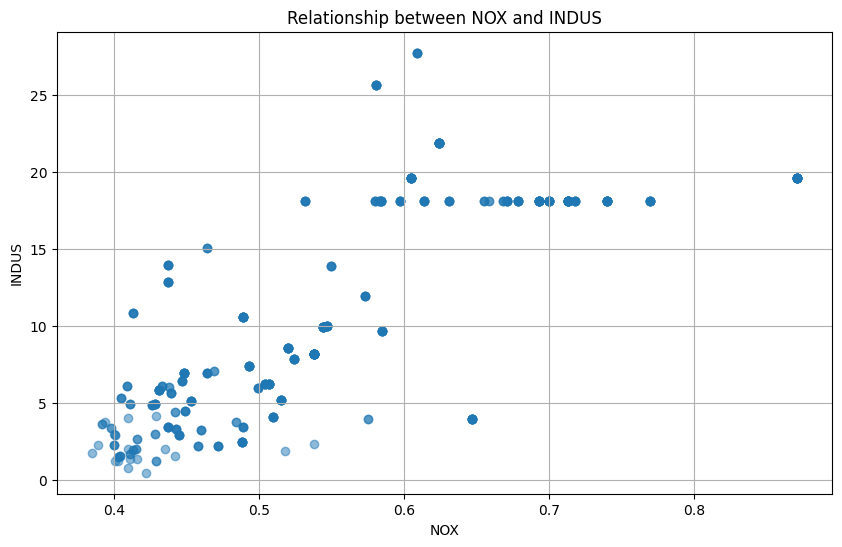

In [19]:
# Relationship between NOX and INDUS
pyplot.figure(figsize=(10, 6))
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.5)
pyplot.title('Relationship between NOX and INDUS')
pyplot.xlabel('NOX')
pyplot.ylabel('INDUS')
pyplot.grid(True)  
pyplot.show()

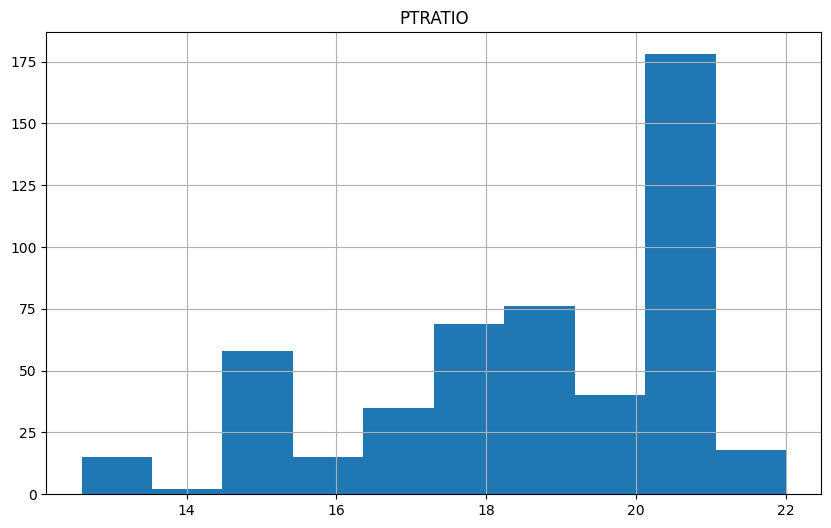

In [20]:
# PTRATIO
pyplot.figure(figsize=(10, 6))
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('PTRATIO')
pyplot.grid(True)  
pyplot.show()

In [22]:
# statistical analysis
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
stat, p_value = scipy.stats.levene(medv_chas_1, medv_chas_0)
alpha = 0.05  # Significance level
if p_value > alpha:
    print("Fail to reject the null hypothesis: Variances are equal.")
else:
    print("Reject the null hypothesis: Variances are not equal.")

Reject the null hypothesis: Variances are not equal.


In [25]:
t_stat, p_value = scipy.stats.ttest_ind(medv_chas_1, medv_chas_0, equal_var=False)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in MEDV.")
else:
    print("Fail to reject the null hypothesis: No significant difference in MEDV.")

Reject the null hypothesis: There is a significant difference in MEDV.


In [27]:
group1 = boston_df[boston_df['AGE_Group'] == 'Group 1']['MEDV']
group2 = boston_df[boston_df['AGE_Group'] == 'Group 2']['MEDV']
group3 = boston_df[boston_df['AGE_Group'] == 'Group 3']['MEDV']
f_stat, p_value = scipy.stats.f_oneway(group1, group2, group3)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in MEDV among the AGE groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in MEDV among the AGE groups.")

<ipython-input-27-4a39be2914b0>:4: DegenerateDataWarning: at least one input has length 0
  f_stat, p_value = scipy.stats.f_oneway(group1, group2, group3)


Fail to reject the null hypothesis: No significant difference in MEDV among the AGE groups.


In [28]:
nox = boston_df['NOX']
indus = boston_df['INDUS']
correlation_coefficient, p_value = scipy.stats.pearsonr(nox, indus)
if p_value < alpha:
    print(f"Reject the null hypothesis: There is a significant correlation between NOX and INDUS (r = {correlation_coefficient:.2f}).")
else:
    print(f"Fail to reject the null hypothesis: No significant correlation between NOX and INDUS (r = {correlation_coefficient:.2f}).")

Reject the null hypothesis: There is a significant correlation between NOX and INDUS (r = 0.76).


In [29]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           1.21e-08
Time:                        20:35:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

AUTHOR


ABDUJABBOROV ABDURASUL

 
I hope you liked this :)